Data Pre-Processing

In [18]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU,RNN
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.callbacks import TensorBoard

In [19]:
dataset = read_csv("C1.csv")
dataset.fillna(0, inplace=True)
values = dataset.values

In [20]:
dataset.head()

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,17.3,2.8,0.0,17.3,0.0,0.0
1,1,1,1,0,0,17.1,2.4,0.0,17.1,0.0,0.0
2,1,1,2,0,0,16.7,1.9,0.0,16.7,0.0,0.0
3,1,1,3,0,0,16.5,1.5,0.0,16.5,0.0,0.0
4,1,1,4,0,0,16.4,1.4,0.0,16.4,0.0,0.0


In [21]:
# dataset.drop(['YEAR','MO','DY','Unnamed: 3','HR','Unnamed: 5'],axis='columns', inplace=True)

In [22]:
dataset.head(5)

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,17.3,2.8,0.0,17.3,0.0,0.0
1,1,1,1,0,0,17.1,2.4,0.0,17.1,0.0,0.0
2,1,1,2,0,0,16.7,1.9,0.0,16.7,0.0,0.0
3,1,1,3,0,0,16.5,1.5,0.0,16.5,0.0,0.0
4,1,1,4,0,0,16.4,1.4,0.0,16.4,0.0,0.0


Removing last 24 hours data from dataset (for Power generation)

In [23]:
df = dataset['DC Array Output (W)']
df = df.iloc[:-24]
df

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8732    0.0
8733    0.0
8734    0.0
8735    0.0
8736    0.0
Name: DC Array Output (W), Length: 8737, dtype: float64

Text(0, 0.5, 'solar power in Watts')

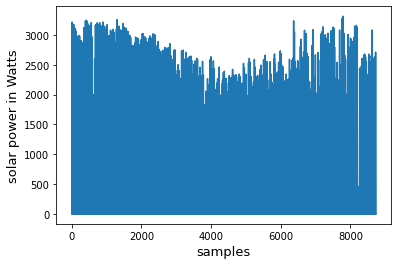

In [24]:
import matplotlib.pyplot as plt
plt.plot(df)
plt.xlabel('samples',fontsize=13)
plt.ylabel('solar power in Watts', fontsize=13)

In [25]:
df

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8732    0.0
8733    0.0
8734    0.0
8735    0.0
8736    0.0
Name: DC Array Output (W), Length: 8737, dtype: float64

In [26]:
correlation_matrix = dataset.corr()
correlation_matrix

,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
Beam Irradiance (W/m^2),1.000000,0.999808,0.999869,0.999837,0.999954,0.999900,0.999950,0.999950
Diffuse Irradiance (W/m^2),0.999808,1.000000,0.999894,0.999894,0.999940,0.999914,0.999946,0.999945
Ambient Temperature (C),0.999869,0.999894,1.000000,0.999983,0.999913,0.999996,0.999916,0.999915
Wind Speed (m/s),0.999837,0.999894,0.999983,1.000000,0.999895,0.999977,0.999901,0.999900
Plane of Array Irradiance (W/m^2),0.999954,0.999940,0.999913,0.999895,1.000000,0.999944,1.000000,1.000000
Cell Temperature (C),0.999900,0.999914,0.999996,0.999977,0.999944,1.000000,0.999946,0.999945
DC Array Output (W),0.999950,0.999946,0.999916,0.999901,1.000000,0.999946,1.000000,1.000000
AC System Output (W),0.999950,0.999945,0.999915,0.999900,1.000000,0.999945,1.000000,1.000000


Transforming the values in scale of [0,1]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [28]:
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Separating data for training and test - 70:30 ratio

In [29]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [30]:
train_data.shape

(6115, 1)

In [31]:
import numpy
def create_dataset(dataset,time_step):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
      a = dataset[i:(i+time_step),0]
      dataX.append(a)
      dataY.append(dataset[i+time_step,0])
    return np.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step =24

X_train, y_train = create_dataset(train_data, time_step)

X_test, ytest = create_dataset(test_data, time_step)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='relu'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
# regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
opt = keras.optimizers.Adam(learning_rate=0.01)
regressorGRU.compile(optimizer=opt,loss='mean_squared_error')
regressorGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 24, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 24, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 24, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 24, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 24, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

In [35]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
# model.fit(X_train,y_train,validation_data = (X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=[early_stop])
import time
tic = time.time()
regressorGRU.fit(X_train,y_train,validation_data = (X_test,ytest),epochs=50,batch_size=64,verbose=1)
toc = time.time()
print("Running time" + " " + str(toc-tic)+'s')

Epoch 1/50
96/96 [==============================] - 11s 68ms/step - loss: 0.0582 - val_loss: 0.0153
Epoch 2/50
96/96 [==============================] - 6s 62ms/step - loss: 0.0118 - val_loss: 0.0077
Epoch 3/50
96/96 [==============================] - 6s 61ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 4/50
96/96 [==============================] - 6s 62ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 5/50
96/96 [==============================] - 6s 62ms/step - loss: 0.0079 - val_loss: 0.0069
Epoch 6/50
96/96 [==============================] - 6s 62ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 7/50
96/96 [==============================] - 6s 61ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 8/50
96/96 [==============================] - 6s 61ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 9/50
96/96 [==============================] - 6s 62ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 10/50
96/96 [==============================] - 6s 61ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 11

Text(0, 0.5, 'loss')

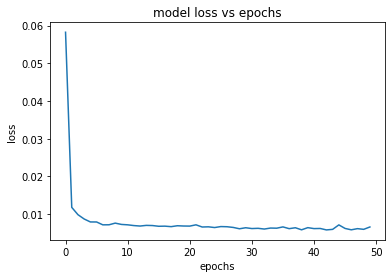

In [36]:
loss_per_epoch = regressorGRU.history.history["loss"]
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
pyplot.title('model loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')

In [37]:
#prediction and check performance metrics
train_predict=regressorGRU.predict(X_train) 
test_predict=regressorGRU.predict(X_test)
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train=y_train.reshape(y_train.shape[0],1)
y_train=scaler.inverse_transform(y_train)
y_train

array([[  0.   ],
       [  0.   ],
       [  0.   ],
       ...,
       [378.714],
       [ 85.92 ],
       [ 16.645]])

In [38]:
ytest=ytest.reshape(ytest.shape[0],1)
ytest=scaler.inverse_transform(ytest)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

309.52196857713835

MSE=95803.84903186702
R2=0.8962481469968393
RMSE=309.52196857713835
MAE=183.4114409029568


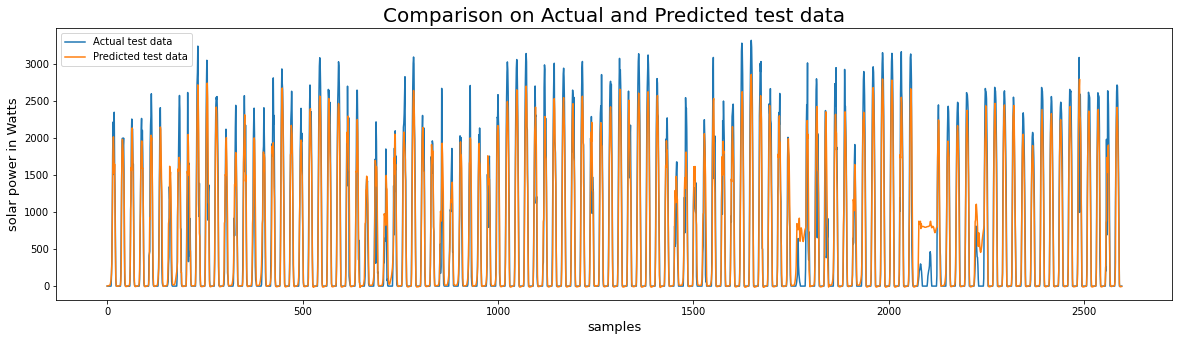

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,5)
from sklearn.metrics import *
from math import sqrt
MSE = mean_squared_error(ytest,test_predict)
R2 = r2_score(ytest,test_predict) # regression score(ratio of actual vs predicted)
RMSE = sqrt(mean_squared_error(ytest,test_predict))
MAE = mean_absolute_error(ytest,test_predict)
print("MSE={}".format(MSE))
print("R2={}".format(R2))
print("RMSE={}".format(RMSE))
print("MAE={}".format(MAE))
#plotting predicted test value vs actual test value
plt.title("Comparison on Actual and Predicted test data",fontsize=20)
plt.plot(ytest, label = 'Actual test data')
plt.plot(test_predict, label = 'Predicted test data')
plt.xlabel('samples',fontsize=13)
plt.ylabel('solar power in Watts', fontsize=13)
plt.legend()
plt.show()

Text(1, 2500, 'R-squared = 0.896')

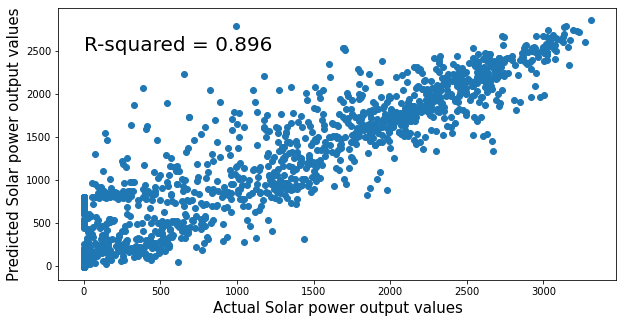

In [41]:
import numpy as np
import matplotlib.pyplot as plt
r_squared =R2
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(ytest,test_predict)
plt.xlabel('Actual Solar power output values', fontsize=15)
plt.ylabel('Predicted Solar power output values', fontsize=15)
plt.annotate("R-squared = {:.3f}".format(r2_score(ytest,test_predict)), (1,2500),fontsize=20)

In [42]:
x_input=test_data[len(test_data)-48:len(test_data)-24].reshape(1,-1)
x_input

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07748793, 0.06213449, 0.59734459, 0.20798222, 0.25853777,
        0.79473671, 0.79143021, 0.73707209, 0.60171814, 0.44220599,
        0.23005404, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07748792935665608,
 0.062134487694752445,
 0.5973445943355009,
 0.20798221959739258,
 0.258537766598097,
 0.794736713385212,
 0.7914302130973161,
 0.7370720850879584,
 0.601718136173705,
 0.44220599215993184,
 0.23005403747205957,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [44]:
#demonstrate prediction for next 24 hours
from numpy import array
lst_output=[]
n_steps=24
i=0
while(i<24):
    if(len(temp_input)>24):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("hour {}  input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape(( x_input.shape[0], n_steps, 1))
        #print(x_input)
        yhat = regressorGRU.predict(x_input, verbose=0)
        print("hour {}  output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((x_input.shape[0], n_steps,1))
        yhat = regressorGRU.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[9.9580735e-05]
25
hour 1  input [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.74879294e-02 6.21344877e-02 5.97344594e-01 2.07982220e-01
 2.58537767e-01 7.94736713e-01 7.91430213e-01 7.37072085e-01
 6.01718136e-01 4.42205992e-01 2.30054037e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.95807350e-05]
hour 1  output [[0.00054766]]
hour 2  input [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.74879294e-02
 6.21344877e-02 5.97344594e-01 2.07982220e-01 2.58537767e-01
 7.94736713e-01 7.91430213e-01 7.37072085e-01 6.01718136e-01
 4.42205992e-01 2.30054037e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.95807350e-05 5.47662377e-04]
hour 2  output [[0.00114051]]
hour 3  input [0.00000000e+00 0.00000000e+00 7.74879294e-02 6.21344877e-02
 5.97344594e-01 2.07982220e-01 2.58537767e-01 7.94736713e-01
 7.91430213e-01 7.37072

In [45]:
print(scaler.inverse_transform(lst_output))

[[3.29807511e-01]
 [1.81383643e+00]
 [3.77733301e+00]
 [6.17802101e+00]
 [2.17663703e+01]
 [6.40795413e+01]
 [3.02262445e+02]
 [8.49000312e+02]
 [1.31973353e+03]
 [1.57654845e+03]
 [1.61781418e+03]
 [1.60499883e+03]
 [1.44916080e+03]
 [1.09698733e+03]
 [7.26722725e+02]
 [3.12979715e+02]
 [1.95999072e+01]
 [1.43939862e+01]
 [6.32943315e+00]
 [9.36058761e+00]
 [8.22067213e+00]
 [9.34150070e+00]
 [9.66809416e+00]
 [1.08658441e+01]]


In [46]:
futurepred=scaler.inverse_transform(lst_output)
futurepred

array([[3.29807511e-01],
       [1.81383643e+00],
       [3.77733301e+00],
       [6.17802101e+00],
       [2.17663703e+01],
       [6.40795413e+01],
       [3.02262445e+02],
       [8.49000312e+02],
       [1.31973353e+03],
       [1.57654845e+03],
       [1.61781418e+03],
       [1.60499883e+03],
       [1.44916080e+03],
       [1.09698733e+03],
       [7.26722725e+02],
       [3.12979715e+02],
       [1.95999072e+01],
       [1.43939862e+01],
       [6.32943315e+00],
       [9.36058761e+00],
       [8.22067213e+00],
       [9.34150070e+00],
       [9.66809416e+00],
       [1.08658441e+01]])

In [47]:
last=np.array(dataset['DC Array Output (W)'])
last=last.reshape(-1,1)
last=last[len(last)-48 :len(last)-24]
last

array([[   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [ 263.997],
       [1123.559],
       [1722.301],
       [2237.974],
       [2622.907],
       [2709.976],
       [2696.457],
       [2455.301],
       [2017.928],
       [1502.948],
       [ 788.874],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ],
       [   0.   ]])

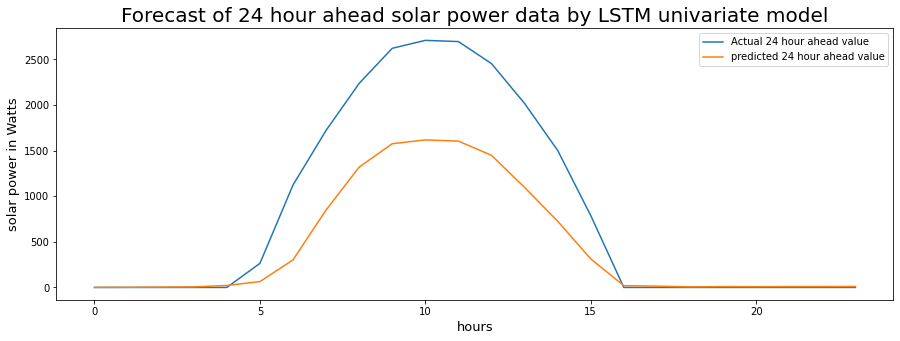

In [48]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(last,label = 'Actual 24 hour ahead value')
plt.plot(futurepred,label = 'predicted 24 hour ahead value')
plt.title("Forecast of 24 hour ahead solar power data by LSTM univariate model",fontsize=20)
plt.xlabel('hours',fontsize=13)
plt.ylabel('solar power in Watts', fontsize=13)
plt.legend(loc='upper left', fontsize=15)
plt.legend()
plt.show()